# Kaggle-Style Titanic EDA + ML Notebook
Full workflow similar to Kaggle competitions.

## 1. Load Data & Quick Look

In [1]:
import pandas as pd, seaborn as sns
train = sns.load_dataset('titanic').copy()
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Cleaning & Feature Engineering

In [2]:
from sklearn.impute import SimpleImputer
train['age'] = SimpleImputer(strategy='median').fit_transform(train[['age']])
train['family_size'] = train['sibsp'] + train['parch']
train[['age','family_size']].head()

,age,family_size
0,22.0,1
1,38.0,1
2,26.0,0
3,35.0,1
4,35.0,0


## 3. Visual EDA

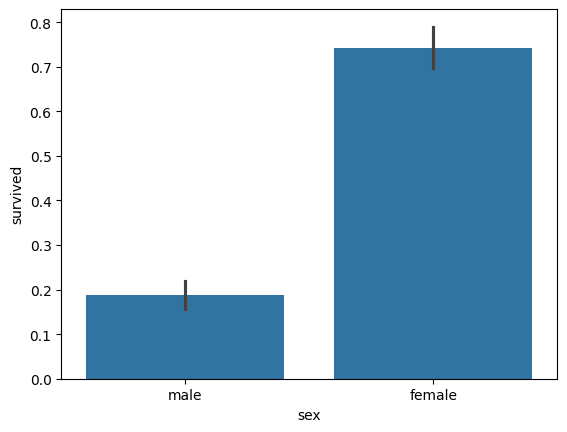

In [3]:
import seaborn as sns, matplotlib.pyplot as plt
sns.barplot(x='sex', y='survived', data=train); plt.show()

## 4. Modeling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

X = pd.get_dummies(train[['pclass','sex','age','fare','family_size','embarked']], drop_first=True)
y = train['survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.8100558659217877